In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/wine-clustering.csv")
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Text(0.5, 1.0, 'Grafik CC')

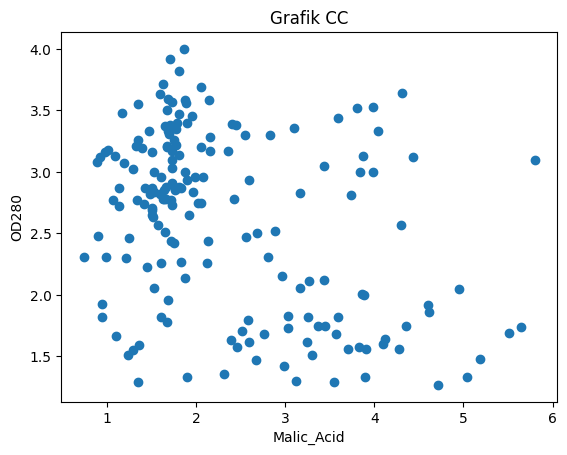

In [ ]:
# Visualisasi Data Scatterplot
plt.scatter(df1['Malic_Acid'], df1['OD280'])
plt.xlabel("Malic_Acid")
plt.ylabel("OD280")
plt.title("Grafik CC")

In [ ]:
# Membuat data training
x_train = df1[['Malic_Acid', 'OD280']].values

In [ ]:
#Feature scaling/perhitungan jarak
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[0.1916996 , 0.97069597],
       [0.2055336 , 0.78021978],
       [0.3201581 , 0.6959707 ],
       [0.23913043, 0.7985348 ],
       [0.36561265, 0.60805861],
       [0.20158103, 0.57875458],
       [0.22332016, 0.84615385],
       [0.27865613, 0.84615385],
       [0.17786561, 0.57875458],
       [0.12055336, 0.83516484],
       [0.28063241, 0.6959707 ],
       [0.14624506, 0.56776557],
       [0.19565217, 0.5970696 ],
       [0.19565217, 0.53479853],
       [0.22332016, 0.63369963],
       [0.21146245, 0.58974359],
       [0.23320158, 0.50549451],
       [0.16403162, 0.47619048],
       [0.16798419, 0.56776557],
       [0.46640316, 0.76556777],
       [0.17588933, 0.89377289],
       [0.60474308, 0.82417582],
       [0.22134387, 1.        ],
       [0.16996047, 0.86446886],
       [0.21146245, 0.93406593],
       [0.25889328, 0.70695971],
       [0.20355731, 0.71428571],
       [0.19367589, 0.54945055],
       [0.22924901, 0.78021978],
       [0.18577075, 0.84981685],
       [0.

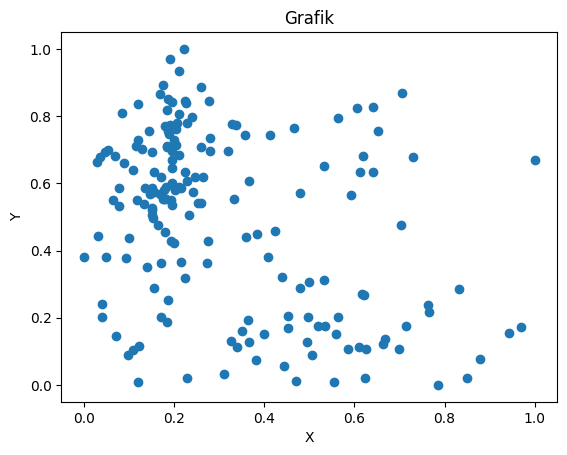

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Grafik")
plt.show()

In [ ]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
dbscan = DBSCAN(eps=0.5, min_samples=160)  # Sesuaikan parameter sesuai data Anda
y_dbscan = dbscan.fit_predict(x_train)

In [ ]:
y_dbscan

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0])

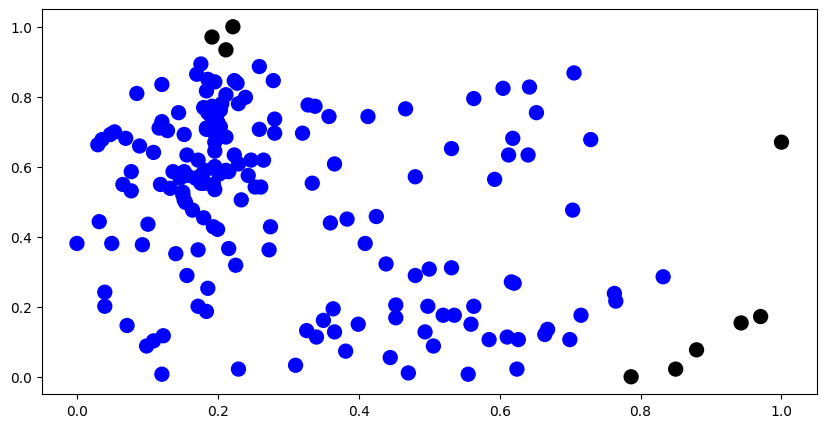

In [ ]:
# Visualisasi Data DBSCAN dengan lingkaran
import numpy as np

plt.figure(figsize=(10, 5))
colors = np.array(['blue', 'green', 'red', 'purple', 'yellow', 'cyan', 'orange', 'pink', 'brown', 'gray', 'black'])
plt.scatter(x_train[:, 0], x_train[:, 1], c=colors[y_dbscan], s=100, marker='o')

In [ ]:
# Menampilkan hasil clustering
df1['DBSCAN_Cluster'] = y_dbscan

In [ ]:
df1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,DBSCAN_Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,-1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


ternyata patahan terlihat di angka 2, brrti K terbaik ada di 2

In [ ]:
cluster_counts = df1['DBSCAN_Cluster'].value_counts()
cluster_counts

DBSCAN_Cluster
 0    169
-1      9
Name: count, dtype: int64

In [ ]:
df1["Pengelompokkan"] = df1['DBSCAN_Cluster'].replace([0,-1],['terdata','nois'])
df1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,DBSCAN_Cluster,Pengelompokkan
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-1,nois
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,terdata
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,terdata
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,terdata
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,terdata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,-1,nois
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,terdata
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,terdata
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,terdata


In [ ]:
# Menghitung jumlah mahasiswa dengan status "tidak lulus," "lulus," dan "memuaskan"
tidak_lulus_count = df1[df1['Pengelompokkan'] == 'nois']['Pengelompokkan'].count()
lulus_count = df1[df1['Pengelompokkan'] == 'terdata']['Pengelompokkan'].count()
memuaskan_count = df1[df1['Pengelompokkan'] == 'memuaskan']['Pengelompokkan'].count()

# Membuat kesimpulan
kesimpulan = f"Data ini memiliki {tidak_lulus_count} nois, {lulus_count} terdata."

# Menampilkan kesimpulan
print(kesimpulan)

Data ini memiliki 9 nois, 169 terdata.
